# Bike sharing prediction
#### Machine learning algorithms for prediction of bike sharing demand in Washington D.C.

#### Introduction: 
Bike-sharing has really clicked into a higher gear in recent years.Today, there is great interest in these systems as they play an important role in transport, the environment, and health.
The characteristics of the data generated by these systems make them attractive for research. 
In this study, it is predicted the total number of bikes that will be rented in each hour of the test period, using only the information that is available before the rental period.
The hypothesis in the research is that the bike sharing are highly related with the time of the day, season and weather conditions. 
this information can be used not only by bike companies but also in many different areas like organizers, and policymakers...

## Data Fields<br>

datetime - hourly date + timestamp<br>  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>  
holiday - whether the day is considered a holiday<br>  
workingday - whether the day is neither a weekend nor holiday<br>  
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>  
temp - temperature in Celsius<br>  
atemp - "feels like" temperature in Celsius<br>  
humidity - relative humidity<br>  
windspeed - wind speed<br>  
casual - number of non-registered user rentals initiated<br>  
registered - number of registered user rentals initiated<br>  
count - number of total rentals<br>  

*The data is gathered from Kaggle.*

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("bike-sharing-data.csv") # data loaded

In [5]:
df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
df.isnull().sum()    # there is no missing value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.dtypes     # we must convert "datetime" variable from object to "datetime64" data type

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:

df['datetime'] = df['datetime'].astype('datetime64')


In [9]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [10]:
df['weekday'] = df['datetime'].dt.day_name()    # splitted datetime to"weekday", "month" and "hour" and added as columns
df['month'] = df['datetime'].dt.month_name()
df['hour'] = df['datetime'].dt.hour


In [11]:
df.drop('datetime', axis='columns', inplace=True)   # we don't need "datetime" anymore  


In [12]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,hour
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,22
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,Wednesday,December,23


In [13]:
df.groupby('hour')['count'].sum() 


hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

In [14]:
from matplotlib import pyplot as plt


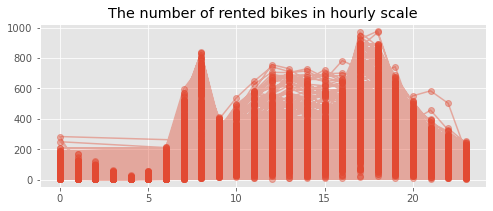

In [15]:
dfg=pd.DataFrame({'x_values': df['hour'], 'y_values': df['count']})
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,3)

# Cut your window in 1 row and 2 columns, and start a plot in the first part

plt.plot( 'x_values', 'y_values', data=dfg, marker='o', alpha=0.4)
plt.title("The number of rented bikes in hourly scale")
 
# And now add something in the second part:

fig = plt.gcf()
fig.savefig('hourgraph.png')

 
# Show the graph
plt.show()                               # check the number of rented bikes per hour...


In [16]:
import matplotlib.pyplot as plt

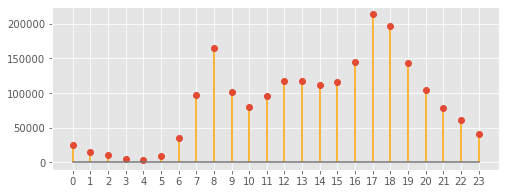

In [17]:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

plt.style.use('ggplot') 

h = df.groupby('hour')['count'].sum() #sum of counts per hour in a day

hour_df = pd.DataFrame(h)
#ordered_h = hour_df.sort_values(by='count')
my_range = range(len(hour_df.index))
plt.stem(hour_df['count'], linefmt='orange');
plt.xticks( my_range, hour_df.index);
fig = plt.gcf()
fig.savefig('8.png')                               # total number of rented bikes per hour


In [18]:
df['weekday'].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: weekday, dtype: int64

In [19]:
df.groupby('weekday')['count'].sum()            # total number of rental bikes per weekday


weekday
Friday       302504
Monday       295296
Saturday     311518
Sunday       285546
Thursday     306401
Tuesday      291985
Wednesday    292226
Name: count, dtype: int64

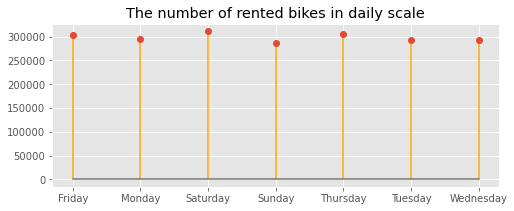

In [20]:

plt.style.use('ggplot') 

w = df.groupby('weekday')['count'].sum()            #sum of counts per hour in a day

week_df = pd.DataFrame(w)
plt.title("The number of rented bikes in daily scale")
#ordered_h = hour_df.sort_values(by='count')
my_range = range(len(week_df.index))
plt.stem(week_df['count'], linefmt='orange');
plt.xticks( my_range, week_df.index);


fig = plt.gcf()
fig.savefig('9.png')
plt.show()

In [21]:
df['month']

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: month, Length: 10886, dtype: object

In [22]:
df.groupby('month')['count'].sum()     #  number of rented bikes per month

month
April        167402
August       213516
December     160160
February      99113
January       79884
July         214617
June         220733
March        133501
May          200147
November     176440
October      207434
September    212529
Name: count, dtype: int64

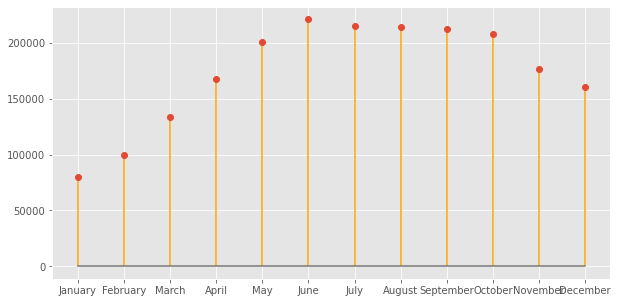

In [23]:

plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (10,5)
month_values = ['January', 'February','March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'] 

m = df.groupby('month')['count'].sum() #sum of counts per hour in a day

month_df = pd.DataFrame(m)#
month_df = month_df.reindex(month_values)


my_range = range(len(month_df.index))
plt.stem(month_df['count'], linefmt='orange', );
plt.xticks( my_range, month_df.index);
fig = plt.gcf()
fig.savefig('10.png')

In [24]:
#import matplotlib.pyplot as plt
#data = df.groupby('weekday')['casual'].sum()
#plt.pie(data.values , labels = data.index , shadow = True , autopct='%.2f' )
#plt.title('casual customer count per weekday')
#plt.show()

In [25]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'weekday',
       'month', 'hour'],
      dtype='object')

In [26]:
import seaborn as sns

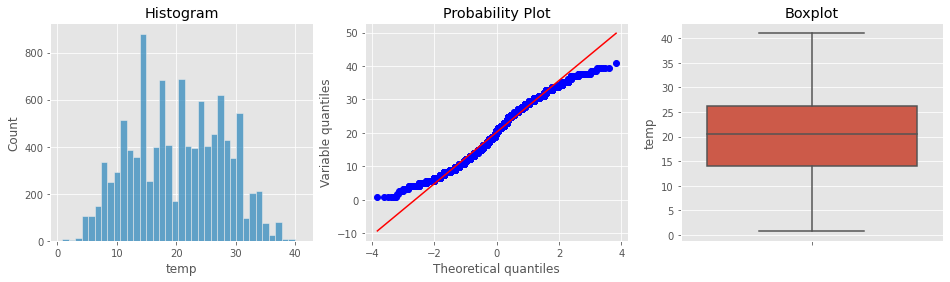

In [34]:
from scipy import stats

def diagnostic_plots( variable, df=df):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins='auto')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
diagnostic_plots('temp')        
                                             
"""Quantile plots : This type of is to assess whether the distribution of the residual is normal or not. 
The graph is between the actual distribution of residual quantiles and a perfectly normal distribution residuals. 
If the graph is perfectly overlaying on the diagonal, the residual is normally distributed.
As we saw in qqplot for 4 variables none of them have normal distribution.
Therefore we will use PowerTransformer for normalizing distribution of  these variables.


There are some outliers that are visible in the pboxplot for "humidity" and "windspeed".

"""

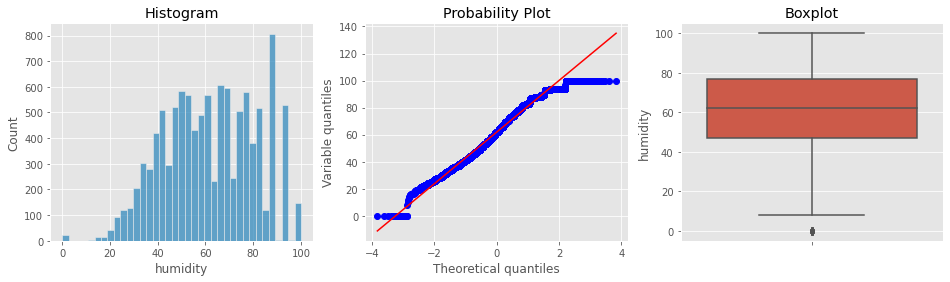

In [35]:
diagnostic_plots('humidity')

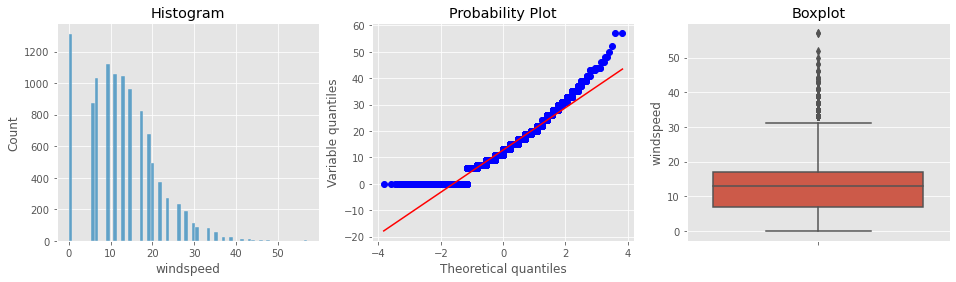

In [36]:
diagnostic_plots('windspeed')

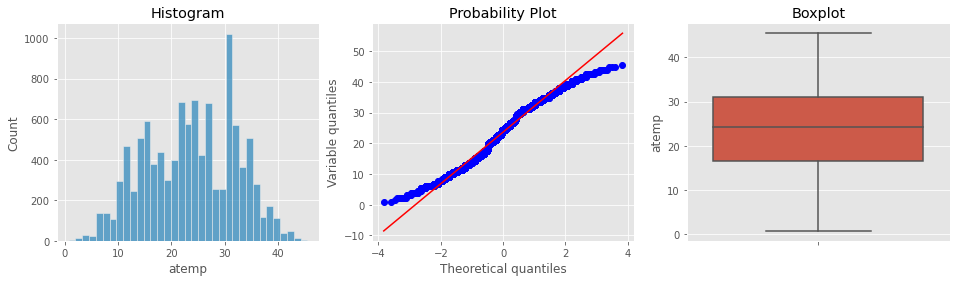

In [37]:
diagnostic_plots('atemp')

"  'Regplot's were checked to see the relationship between our numeric variables and the number of bike rentals.\nThat is to say how good our numeric feature explains/predicts our target variable.\nAs we seen atemp and temp features aren't good enough to solely predict our target variable , \nthat kinda makes them available for using as one of the predictors for our model.\nThe variable 'atemp' indicates the temperature felt. I chose to use one of the two variables because it is the same as the 'temp' variable.\n"

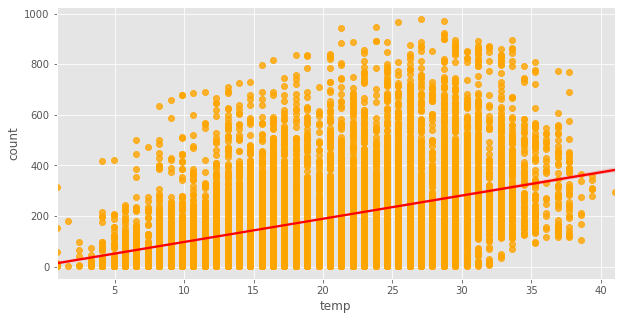

In [38]:
sns.regplot(x=df["temp"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('1.png')                      

"""  'Regplot's were checked to see the relationship between our numeric variables and the number of bike rentals.
That is to say how good our numeric feature explains/predicts our target variable.
As we seen atemp and temp features aren't good enough to solely predict our target variable , 
that kinda makes them available for using as one of the predictors for our model.
The variable 'atemp' indicates the temperature felt. I chose to use one of the two variables because it is the same as the 'temp' variable.
"""


" 'humidity' features aren't good enough to solely predict our target variable.\n"

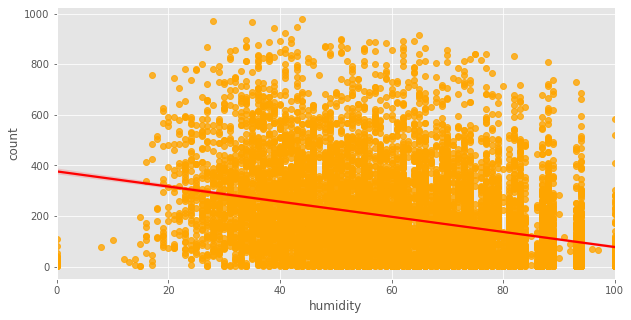

In [40]:
sns.regplot(x=df["humidity"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('2.png')

""" 'humidity' features aren't good enough to solely predict our target variable.
"""


"'windspeed' features aren't good enough to solely predict our target variable.\n"

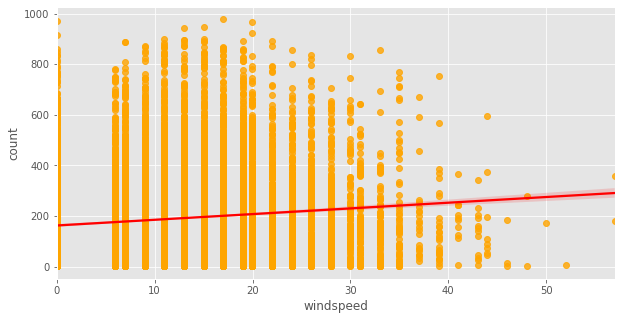

In [41]:
sns.regplot(x=df["windspeed"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('3.png')



"""'windspeed' features aren't good enough to solely predict our target variable.
"""

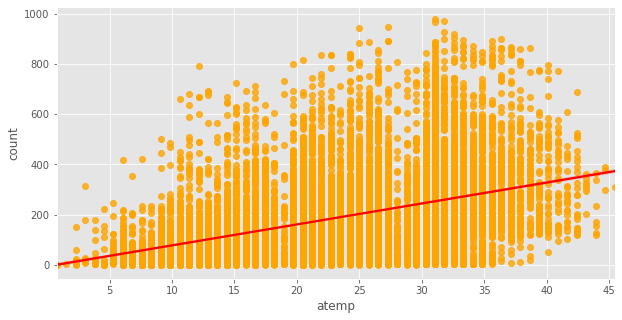

In [42]:
sns.regplot(x=df["atemp"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('4.png')

In [43]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [44]:
# Define a function to reassign up/low limits to the ones above/below up/low limits with apply/lambda

def replace_with_thresholds_with_lambda(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe[variable] = dataframe[variable].apply(
        lambda x: up_limit if x > up_limit else (low_limit if x < low_limit else x))

In [45]:
replace_with_thresholds_with_lambda(df, "windspeed") # replace outliers with thresholds....

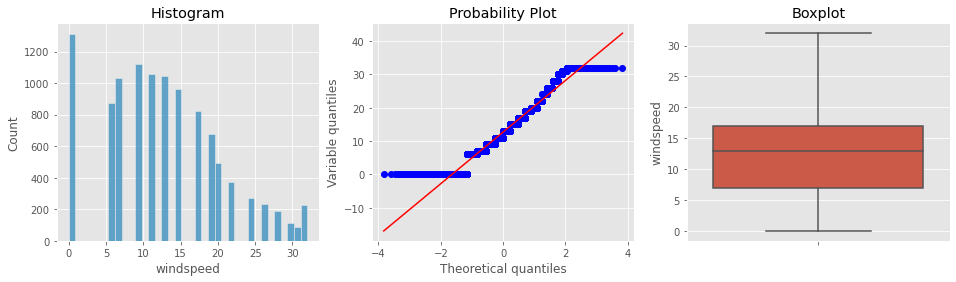

In [46]:
diagnostic_plots('windspeed')

In [47]:
replace_with_thresholds_with_lambda(df, "humidity")

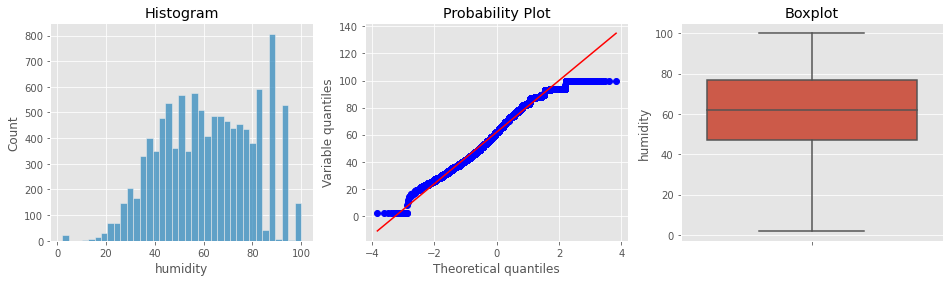

In [48]:
diagnostic_plots('humidity')          # replace outliers with thresholds....

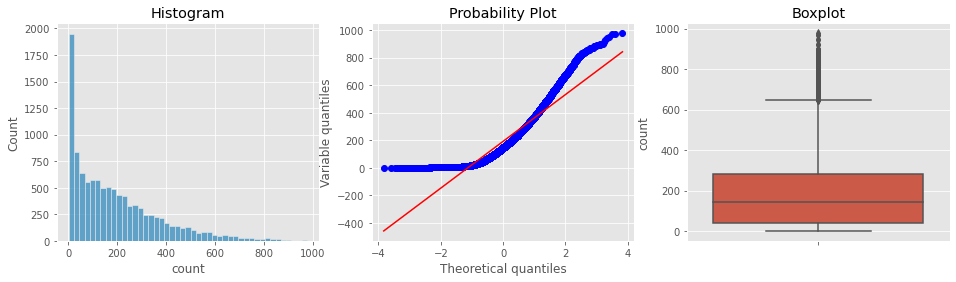

In [49]:
diagnostic_plots('count')

In [50]:
len(df['count'])


10886

In [51]:
outlier_thresholds(df, 'count')

(-321.0, 647.0)

In [52]:
len(df['count'][df['count']>647])        # drop outliers..we lost just %2,7 values of data set


300

In [53]:
df.drop(df[df['count'] > 647].index, inplace=True)


In [54]:
len(df)   


10586

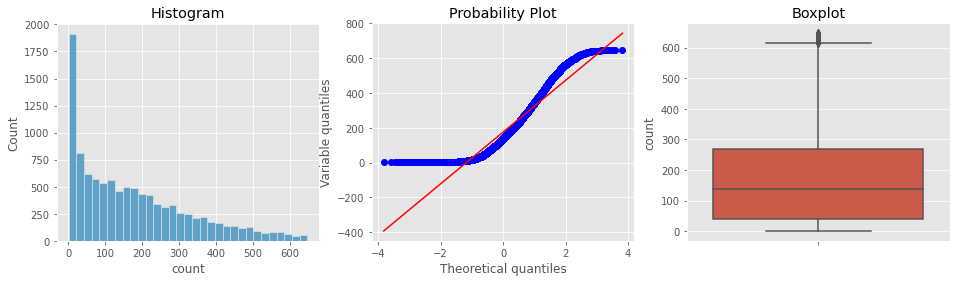

'The distribution of "cnt" column does not looks like Normal distribution.\nIt is more similar to "Exponential-logarithmic distribution" and it\'s highly skewed at the left.\nThat\'s why we did log transformation....'

In [55]:
diagnostic_plots('count')                  

"""The distribution of "cnt" column does not looks like Normal distribution.
It is more similar to "Exponential-logarithmic distribution" and it's highly skewed at the left.
That's why we did log transformation....""" 

'check the count of rented bikes per season'

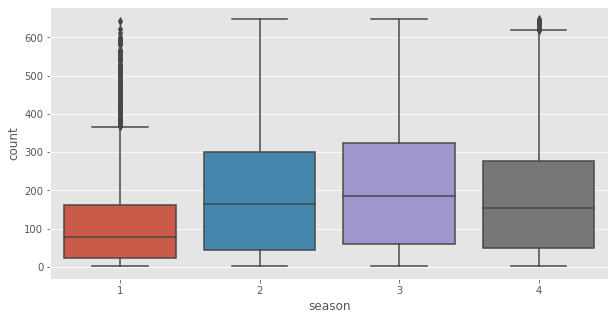

In [56]:
sns.boxplot( x=df["season"], y=df["count"] );               """check the count of rented bikes per season"""

'check the count of rented bikes per holiday'

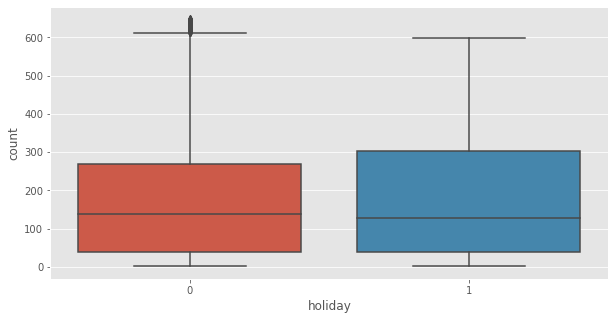

In [57]:
sns.boxplot( x=df["holiday"], y=df["count"] );    """check the count of rented bikes per holiday"""

'check the count of rented bikes per workingday'

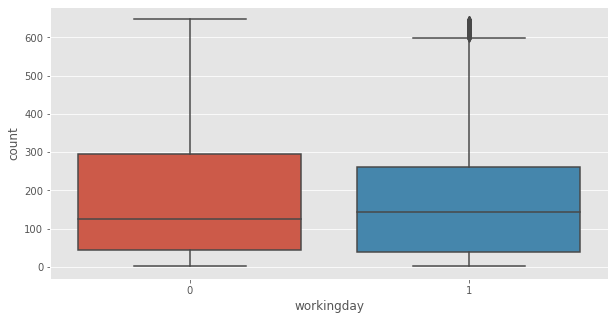

In [58]:
sns.boxplot( x=df["workingday"], y=df["count"] );             """check the count of rented bikes per workingday"""

'check the count of rented bikes per weather'

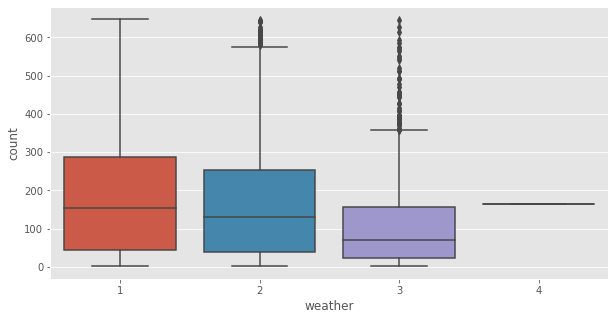

In [59]:
sns.boxplot( x=df["weather"], y=df["count"] );           """check the count of rented bikes per weather"""

In [60]:
from sklearn.preprocessing import PowerTransformer


In [61]:
pt = PowerTransformer()
df['temp'] = pt.fit_transform(df['temp'].values.reshape(-1, 1))


"""applied Power Transform to 'humidity' and 'windspeed' """


"applied Power Transform to 'humidity' and 'windspeed' "

In [62]:
pt = PowerTransformer()
df['humidity'] = pt.fit_transform(df['humidity'].values.reshape(-1, 1))



In [74]:
pt = PowerTransformer()
df['windspeed'] = pt.fit_transform(df['windspeed'].values.reshape(-1, 1))

In [75]:
pt = PowerTransformer()
df['atemp'] = pt.fit_transform(df['atemp'].values.reshape(-1, 1))

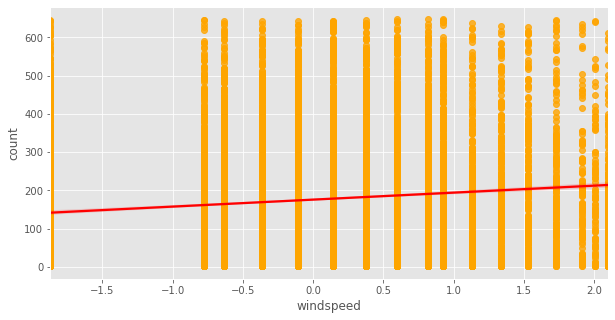

In [67]:
sns.regplot(x=df["windspeed"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()


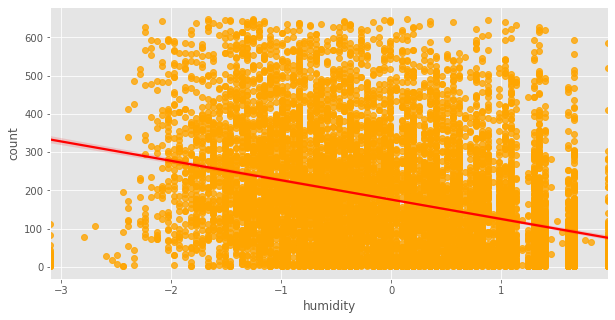

In [68]:
sns.regplot(x=df["humidity"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()

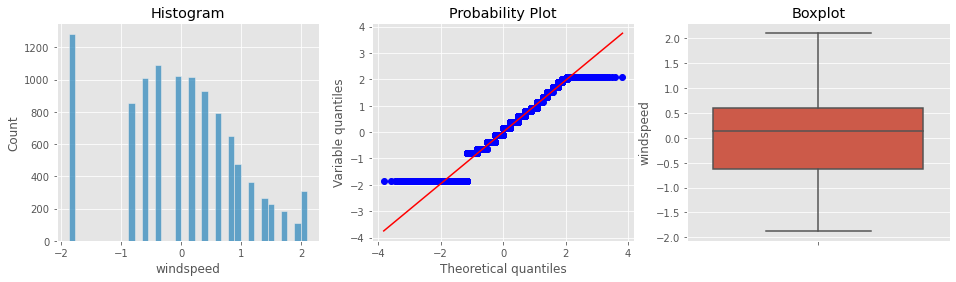

In [69]:
diagnostic_plots('windspeed')

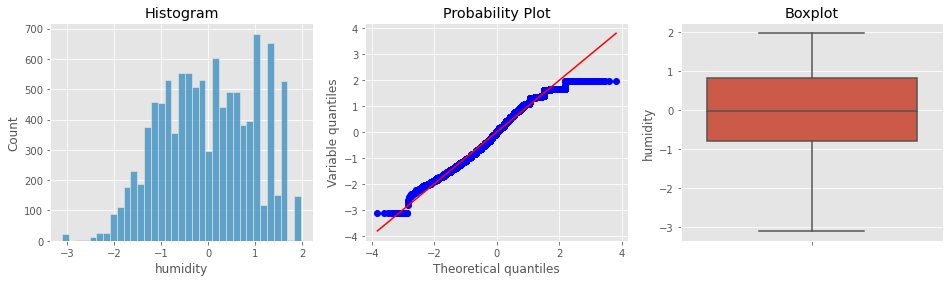

In [70]:
diagnostic_plots('humidity')

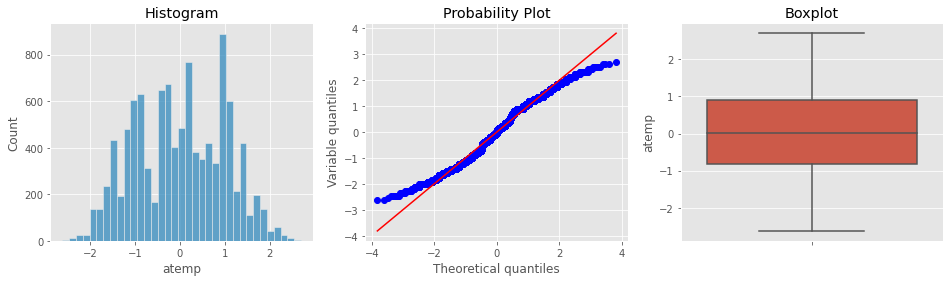

In [71]:
diagnostic_plots('atemp')

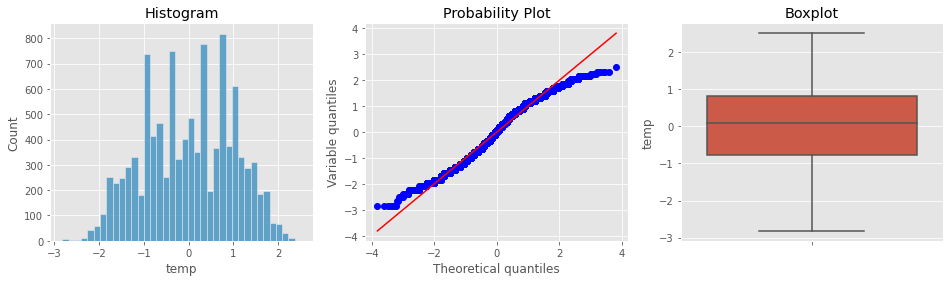

In [72]:
diagnostic_plots('temp')

In [58]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,hour
0,1,0,0,1,-1.337036,-1.071073,0.980261,-1.870945,3,13,16,Saturday,January,0
1,1,0,0,1,-1.456365,-1.162906,0.928013,-1.870945,8,32,40,Saturday,January,1
2,1,0,0,1,-1.456365,-1.162906,0.928013,-1.870945,5,27,32,Saturday,January,2
3,1,0,0,1,-1.337036,-1.071073,0.666901,-1.870945,3,10,13,Saturday,January,3
4,1,0,0,1,-1.337036,-1.071073,0.666901,-1.870945,0,1,1,Saturday,January,4


In [59]:
# casual ve registered toplmi count'a esit oldugundan lineer'ligi bozmak icin registered degiskenini sildik...

In [60]:
df.drop('registered', axis=1, inplace=True)      # droped registered

In [61]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,weekday,month,hour
0,1,0,0,1,-1.337036,-1.071073,0.980261,-1.870945,3,16,Saturday,January,0
1,1,0,0,1,-1.456365,-1.162906,0.928013,-1.870945,8,40,Saturday,January,1
2,1,0,0,1,-1.456365,-1.162906,0.928013,-1.870945,5,32,Saturday,January,2
3,1,0,0,1,-1.337036,-1.071073,0.666901,-1.870945,3,13,Saturday,January,3
4,1,0,0,1,-1.337036,-1.071073,0.666901,-1.870945,0,1,Saturday,January,4


In [62]:
from sklearn.preprocessing import StandardScaler    # applied Standart Scale to "causal"...


In [63]:
scaler = StandardScaler()


In [64]:
df['casual'] = scaler.fit_transform(df['casual'].values.reshape(-1, 1))   
"""since casual is feature which has different scaled values, 
that is not which we are looking for when evaluating distance based algorithms , 
we choose to perform scaling on it"""




'since casual is feature which has different scaled values, \nthat is not which we are looking for when evaluating distance based algorithms , \nwe choose to perform scaling on it'

In [65]:
df['casual']

0       -0.659419
1       -0.552969
2       -0.616839
3       -0.659419
4       -0.723289
           ...   
10881   -0.574259
10882   -0.510389
10883   -0.638129
10884   -0.467809
10885   -0.638129
Name: casual, Length: 10586, dtype: float64

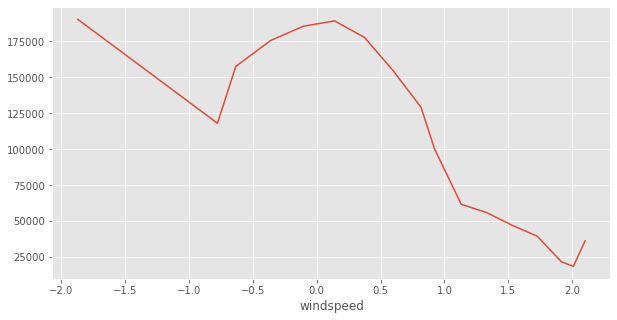

In [66]:
df.groupby('windspeed')['count'].sum().plot()               # lineplot of number of rented bikes by windspeed 
fig = plt.gcf()
fig.savefig('5.png')

In [67]:
sum(df['count'])


1860141

In [68]:
df.groupby('windspeed')['count'].sum()          # number of rented bikes by windspeed... "after power transform "

windspeed
-1.870945    190356
-0.777560    118131
-0.633887    157642
-0.361678    175653
-0.104588    185590
 0.139072    189288
 0.373249    177819
 0.598021    154677
 0.816133    129283
 0.922357    100280
 1.131065     61847
 1.333707     55915
 1.532200     47114
 1.725675     39662
 1.915818     21868
 2.009189     18597
 2.101070     36419
Name: count, dtype: int64

In [69]:
df.groupby('windspeed')['temp'].mean()             # mean windspeed value per temperature

windspeed
-1.870945   -0.049973
-0.777560   -0.066055
-0.633887   -0.014808
-0.361678    0.026594
-0.104588    0.047088
 0.139072    0.088224
 0.373249    0.117770
 0.598021    0.081156
 0.816133    0.050833
 0.922357    0.044941
 1.131065   -0.239771
 1.333707   -0.055953
 1.532200   -0.178255
 1.725675   -0.112217
 1.915818   -0.172466
 2.009189   -0.229497
 2.101070   -0.263410
Name: temp, dtype: float64

<AxesSubplot:xlabel='windspeed'>

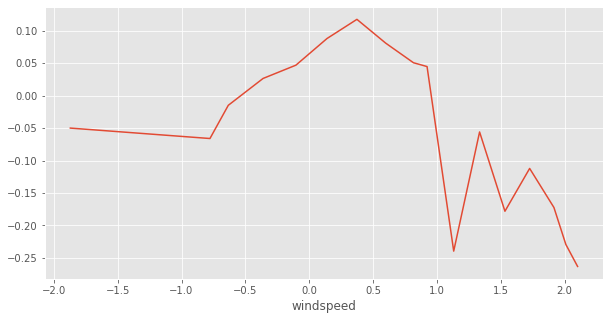

In [70]:
df.groupby('windspeed')['temp'].mean().plot()    # lineplot of mean windspeed value per temperature

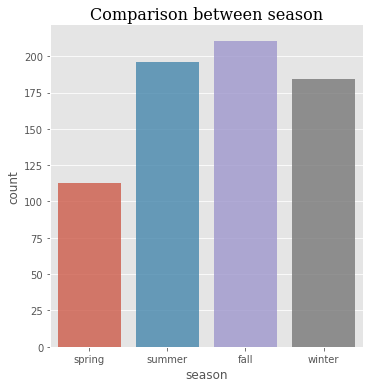

In [75]:
sns.catplot(data = df.replace({'season':{1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'}} , inplace = False)\
           , x = 'season' , y = 'count' , kind = 'bar' , ci = None ,  alpha = 0.8)
plt.title('Comparison between season' , fontdict = {'family':'serif' , 'size':16});


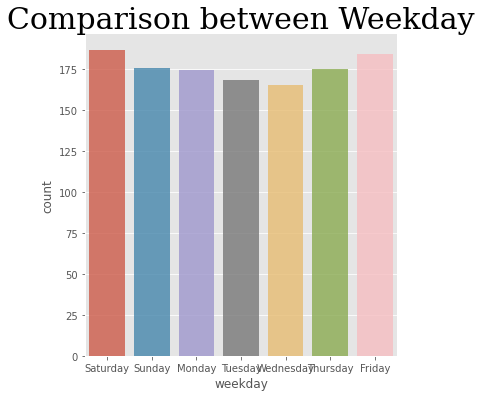

In [76]:
sns.catplot(data = df.replace({'weekday':{1:'Monday' , 2:'Tuesday' , 3:'Wednesday' , 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}} , inplace = False)\
           , x = 'weekday' , y = 'count' , kind = 'bar' , ci = None ,  alpha = 0.8)
plt.title('Comparison between Weekday' , fontdict = {'family':'serif' , 'size':30});


<AxesSubplot:>

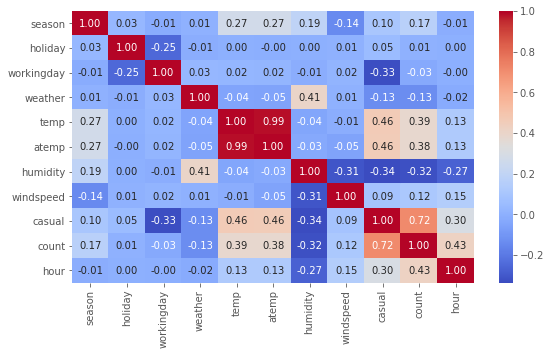

In [77]:
corr = df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'coolwarm' , annot=True , fmt = '.2f')     # there is highly correlation between "temp" and "atemp", 

In [78]:
df.drop('temp', axis=1, inplace=True)    # dropped "temp"

In [79]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'casual', 'count', 'weekday', 'month', 'hour'],
      dtype='object')

In [80]:
days = pd.get_dummies(df['weekday'], drop_first=True)        # encode categorical variable..just for "weekday"...


In [81]:
days

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
10881,0,0,0,0,0,1
10882,0,0,0,0,0,1
10883,0,0,0,0,0,1
10884,0,0,0,0,0,1


In [82]:
df = pd.concat([df, days], axis=1)


In [83]:
X = df.drop(['weekday', 'month', 'count'], axis='columns')    # we considered that "month" is not usefull for modelling...already did encode for "weekday"....


In [84]:
X.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,hour,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,1,-1.071073,0.980261,-1.870945,-0.659419,0,0,1,0,0,0,0
1,1,0,0,1,-1.162906,0.928013,-1.870945,-0.552969,1,0,1,0,0,0,0
2,1,0,0,1,-1.162906,0.928013,-1.870945,-0.616839,2,0,1,0,0,0,0
3,1,0,0,1,-1.071073,0.666901,-1.870945,-0.659419,3,0,1,0,0,0,0
4,1,0,0,1,-1.071073,0.666901,-1.870945,-0.723289,4,0,1,0,0,0,0


In [85]:
y = df['count']


In [86]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import train_test_split


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)                 # splitted test and train set
                 

In [88]:
lr = LinearRegression()


In [89]:
lr.fit(X_train, y_train)


LinearRegression()

In [90]:
lr.score(X_test, y_test)


0.6389700614439944

In [92]:
y_pred = lr.predict(X_test)


In [93]:
y_pred

array([221.640625, 105.109375, 169.15625 , ...,  62.609375, 139.859375,
       138.203125])

In [95]:
y_test.values

array([246, 447,  38, ...,  72,  27,  63], dtype=int64)

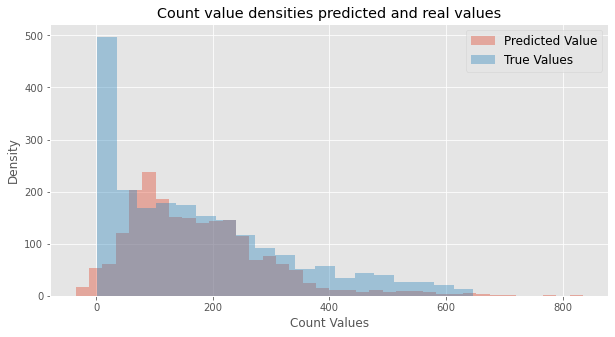

In [104]:
sns.distplot(y_pred, kde=False, label='Predicted Value')
sns.distplot(y_test, kde=False,label = 'True Values')
plt.xlabel('Count Values')
plt.ylabel('Density')
plt.legend(prop={'size': 12})
plt.title('Count value densities predicted and real values')
plt.show()
fig = plt.gcf()
fig.savefig('pre_tru.png')



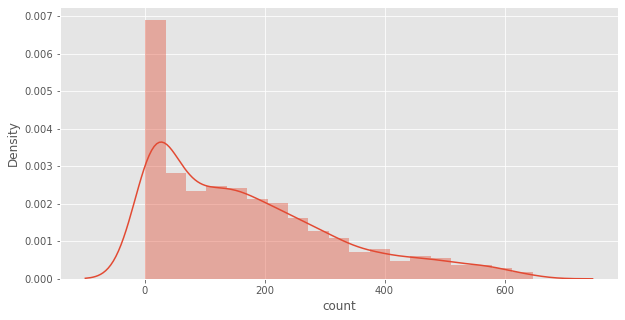

In [102]:
ax = sns.distplot(y_test)

In [91]:
def plot_scores(model,X_train,y_train):
    """
    Functon to plot scores RMSE, MAE, R^2, RMSLE from model.
    
    Inputs
    -------
    - model: a trained model
    - X_train: X_train or X_test DataFrame/Series
    - y_train: y_train or y_test DataFrame/Series
    
    
    """

    assert(y_train.shape[0] == X_train.shape[0])
    
    print("Model parameters ", model.__class__.__name__)
    prediction_train = model.predict(X_train)
    print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_train, prediction_train))))
    print("Mean Absolute Error: " + str(mean_absolute_error(y_train, prediction_train)))
    print("R^2 Coefficient of Determination: " + str(r2_score(y_train, prediction_train)))

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [112]:
plot_scores(lr,X_test,y_test)

Model parameters  LinearRegression
Root Mean Squared Error: 92.35611191590631
Mean Absolute Error: 67.42295207743155
R^2 Coefficient of Determination: 0.6389700614439944


In [104]:
from sklearn import metrics


best k: 6  with r2_score =  0.8723030040622365


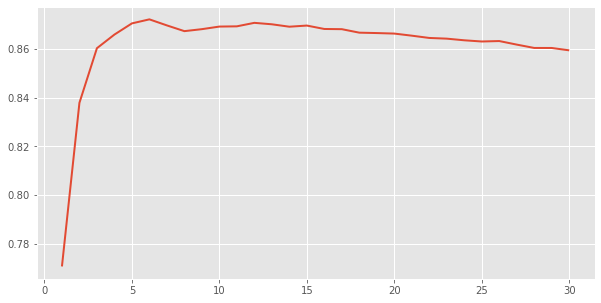

In [105]:
from sklearn.neighbors import KNeighborsRegressor

# lets do this with trial and error for finding the best k
acc = [] # accuracy per k (by accuracy i mean r2_score)
max_r2 = 0
best_k = 0
for k in range(1,31):
    knr = KNeighborsRegressor(n_neighbors = k)
    knr.fit(X_train , y_train)
    knr_pred = knr.predict(X_test)
    r2 = metrics.r2_score(y_test , knr_pred)
    acc.append(r2)
    if r2 > max_r2:
        max_r2 = r2
        best_k = k

print("best k:",best_k , " with r2_score = " , max_r2)
plt.plot(np.arange(1,31) , acc)

In [107]:
 knr = KNeighborsRegressor(n_neighbors = 6)

In [109]:
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [111]:
plot_scores(knr,X_test,y_test)

Model parameters  KNeighborsRegressor
Root Mean Squared Error: 54.926809472277775
Mean Absolute Error: 37.25236071765817
R^2 Coefficient of Determination: 0.8723030040622365


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

best min_samples_leaf: 22  with r2_score =  0.8932644791398702


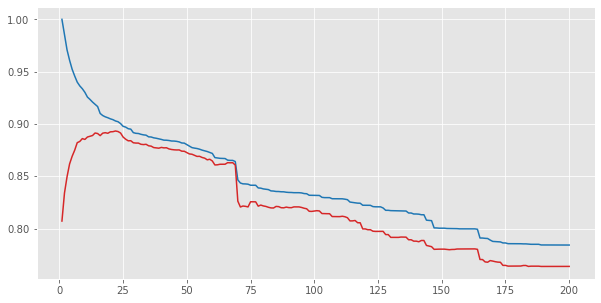

In [108]:
from sklearn.tree import DecisionTreeRegressor

# lets find the best min_samples_leaf with trial and error
acc_test = [] # accuracy per k (by accuracy i mean r2_score)
acc_train = []
max_r2_test = 0
best_k_test = 0
for k in range(1,201):
    rt = DecisionTreeRegressor(min_samples_leaf = k , random_state = 1)
    rt.fit(X_train , y_train)
    rt_pred_train = rt.predict(X_train)
    rt_pred_test = rt.predict(X_test)
    r2_train = metrics.r2_score(y_train , rt_pred_train)
    r2_test = metrics.r2_score(y_test , rt_pred_test)
    acc_test.append(r2_test)
    acc_train.append(r2_train)
    if r2_test > max_r2_test:
        max_r2_test = r2_test
        best_k_test = k

print("best min_samples_leaf:",best_k_test , " with r2_score = " , max_r2_test)
plt.plot(np.arange(1,201) , acc_train , color = 'tab:blue')
plt.plot(np.arange(1,201) , acc_test , color = 'tab:red')

In [109]:
 rt = DecisionTreeRegressor(min_samples_leaf = 22 , random_state = 1)

In [110]:
rt.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=22, random_state=1)

In [111]:
plot_scores(rt,X_test,y_test)

Model parameters  DecisionTreeRegressor


NameError: name 'mean_squared_error' is not defined

In [105]:
from sklearn.ensemble import RandomForestRegressor



In [113]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).score(X_test, y_test)


0.9056696582252537

In [114]:
plot_scores(rf,X_test,y_test)

Model parameters  RandomForestRegressor
Root Mean Squared Error: 47.20844947501667
Mean Absolute Error: 30.58240330050812
R^2 Coefficient of Determination: 0.9056696582252537


In [115]:
plot_scores(rf,X_train,y_train)

Model parameters  RandomForestRegressor
Root Mean Squared Error: 17.749634703952253
Mean Absolute Error: 11.542972996378523
R^2 Coefficient of Determination: 0.9872178438941528


In [118]:
y_pred_rf=rf.predict(X_test)

In [119]:
y_pred_rf

array([180.33, 388.97,  50.05, ...,  49.24,  27.13,  46.17])

In [120]:
y_test.values

array([246, 447,  38, ...,  72,  27,  63], dtype=int64)

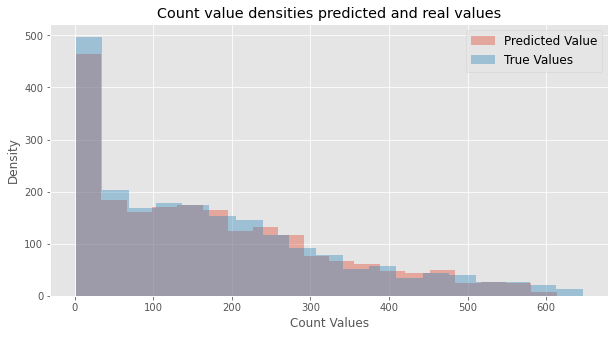

In [122]:
sns.distplot(y_pred_rf, kde=False, label='Predicted Value')
sns.distplot(y_test.values, kde=False,label = 'True Values')
plt.xlabel('Count Values')
plt.ylabel('Density')
plt.legend(prop={'size': 12})

plt.title('Count value densities predicted and real values')

fig = plt.gcf()
fig.savefig('pre_tru.png')
plt.show()


In [127]:
df

,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,count,weekday,month,hour,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,1,-1.071073,0.980261,-1.870945,-0.659419,16,Saturday,January,0,0,1,0,0,0,0
1,1,0,0,1,-1.162906,0.928013,-1.870945,-0.552969,40,Saturday,January,1,0,1,0,0,0,0
2,1,0,0,1,-1.162906,0.928013,-1.870945,-0.616839,32,Saturday,January,2,0,1,0,0,0,0
3,1,0,0,1,-1.071073,0.666901,-1.870945,-0.659419,13,Saturday,January,3,0,1,0,0,0,0
4,1,0,0,1,-1.071073,0.666901,-1.870945,-0.723289,1,Saturday,January,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,-0.436900,-0.634956,1.532200,-0.574259,336,Wednesday,December,19,0,0,0,0,0,1
10882,4,0,1,1,-0.707283,-0.271132,0.373249,-0.510389,241,Wednesday,December,20,0,0,0,0,0,1
10883,4,0,1,1,-0.888735,-0.062972,0.373249,-0.638129,168,Wednesday,December,21,0,0,0,0,0,1
10884,4,0,1,1,-0.707283,-0.062972,-0.777560,-0.467809,129,Wednesday,December,22,0,0,0,0,0,1


In [136]:
non_weekend = df[df['workingday'] == 1]
is_weekend = df[df['workingday'] == 0]
is_holiday = df[df['holiday'] == 1]


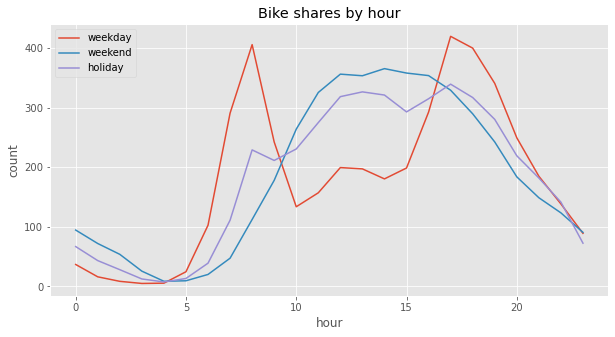

In [139]:
def hourly_plot(df, title='Bike shares by hour'):
    """
    Function for plotting bike shares by hour.
    input:
    df - pandas dataframe
    title - main title of the plot

    """

    df.groupby(by=df.hour)['count'].mean().plot()
    plt.title(title)
    plt.ylabel('count')
    plt.legend(['weekday', 'weekend', 'holiday'], loc=2, fontsize='medium')


hourly_plot(non_weekend)
hourly_plot(is_weekend)
hourly_plot(is_holiday)
fig = plt.gcf()
fig.savefig('byhour.png')



In [135]:
non_weekend.head()


,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,count,weekday,month,hour,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
